# **Forecasting with machine learning**

## Objectives

* use and ml model to forecast apple stock market data

## Accessing and visualising data

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

2023-01-31 23:09:28.427749: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-31 23:09:28.551425: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-31 23:09:28.551453: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-31 23:09:29.408809: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
# Some functions to help out with plotting
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Apple Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Apple Stock Price')
    plt.title('Apple Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Apple Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [4]:
from pathlib import Path
import pandas as pd

path = Path('../stockdata/AAPL_2006-01-01_to_2018-01-01.csv')

apple_stock = pd.read_csv(
    path,
    parse_dates =['Date'],
    index_col='Date',
) 



In [5]:
training_set = apple_stock[:'2016'].iloc[:,1:2].values
test_set = apple_stock['2017':].iloc[:,1:2].values

In [6]:
print(training_set)

[[ 10.68]
 [ 10.85]
 [ 10.7 ]
 ...
 [118.02]
 [117.11]
 [117.2 ]]


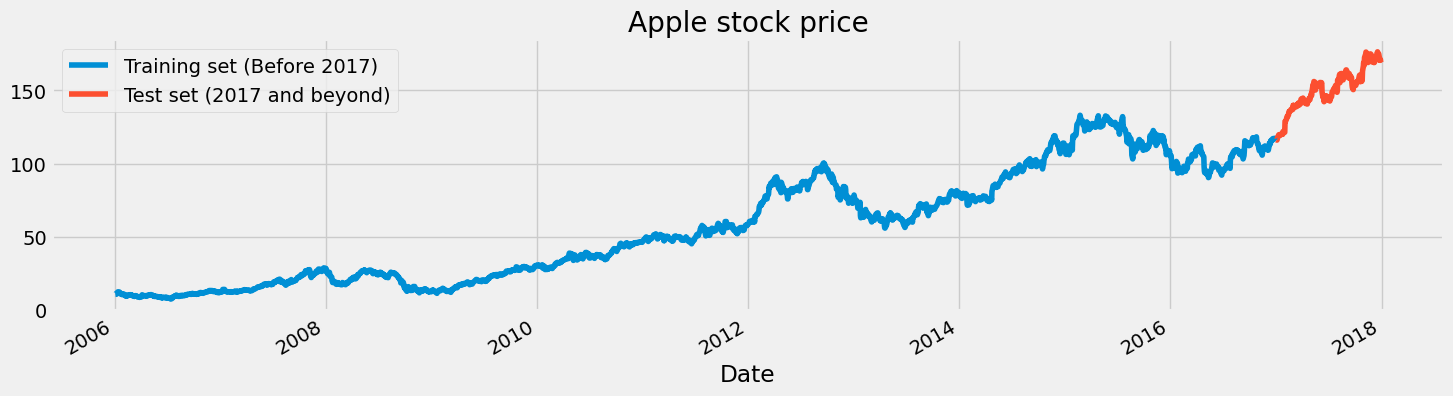

In [7]:
# Plot of Close attribute for stock prices for train and test sets
apple_stock["Close"][:'2016'].plot(figsize=(16,4),legend=True)
apple_stock["Close"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('Apple stock price')
plt.show()

In [8]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(60,2768):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
# Reshape for efficitent modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## Modelling

In [10]:
# The LSTM architecture
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Summary of the model
regressor.summary()

2023-01-31 23:12:31.121768: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-31 23:12:31.121815: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-31 23:12:31.121842: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kylo74-timeseriesanalys-m4dh5repsh7): /proc/driver/nvidia/version does not exist
2023-01-31 23:12:31.122337: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

### Fitting the model to the training data set

In [11]:
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 17s 127ms/step - loss: 0.0177
Epoch 2/50
85/85 [==============================] - 10s 118ms/step - loss: 0.0076
Epoch 3/50
85/85 [==============================] - 9s 108ms/step - loss: 0.0061
Epoch 4/50
85/85 [==============================] - 10s 122ms/step - loss: 0.0051
Epoch 5/50
85/85 [==============================] - 10s 115ms/step - loss: 0.0047
Epoch 6/50
85/85 [==============================] - 10s 122ms/step - loss: 0.0043
Epoch 7/50
85/85 [==============================] - 9s 112ms/step - loss: 0.0036
Epoch 8/50
85/85 [==============================] - 10s 121ms/step - loss: 0.0034
Epoch 9/50
85/85 [==============================] - 10s 114ms/step - loss: 0.0031
Epoch 10/50
85/85 [==============================] - 10s 116ms/step - loss: 0.0030
Epoch 11/50
85/85 [==============================] - 10s 119ms/step - loss: 0.0029
Epoch 12/50
85/85 [==============================] - 10s 120ms/step - loss: 0.0027
Epoch 13/50
85/

In [12]:
apple_stock_total = pd.concat((apple_stock["Close"][:'2016'],apple_stock["Close"]['2017':]),axis=0)
inputs = apple_stock_total[len(apple_stock_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

## Predicting prices and visualising predictions

In [13]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 1s 20ms/step


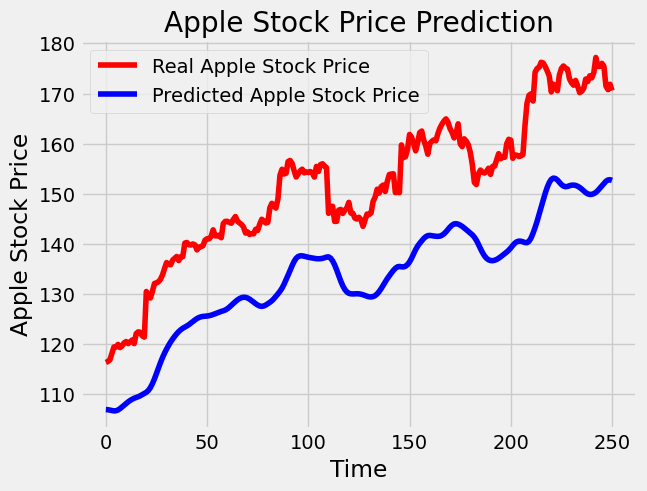

In [14]:
plot_predictions(test_set,predicted_stock_price)

## Model Evaluation

In [15]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 18.362613293948844.
